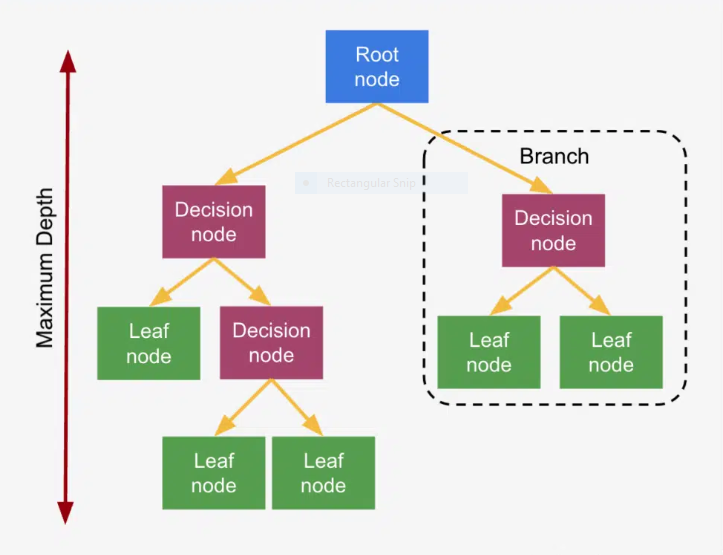

# Giới thiệu về thuật toán Cây quyết định

Thuật toán Cây quyết định là một trong những thuật toán học máy phổ biến nhất. Nó sử dụng một cấu trúc giống như cây và các kết hợp có thể có của chúng để giải quyết một vấn đề cụ thể. Nó thuộc về lớp thuật toán học có giám sát, nơi nó có thể được sử dụng cho cả mục đích phân loại và hồi quy.

Cây quyết định là một cấu trúc bao gồm nút gốc, các nhánh và các nút lá. Mỗi nút bên trong biểu thị một phép thử trên một thuộc tính, mỗi nhánh biểu thị kết quả của một phép thử và mỗi nút lá chứa một nhãn lớp. Nút trên cùng trong cây là nút gốc.

Mình sẽ đưa ra một số giả định trong khi triển khai thuật toán Cây quyết định như sau:

- Khi bắt đầu, toàn bộ tập huấn luyện được coi là Root.
- Giá trị của đối tượng cần phải được phân loại. Nếu các giá trị là liên tục thì chúng sẽ được loại bỏ trước khi xây dựng mô hình.
- Các bản ghi được phân phối một cách đệ quy trên cơ sở các giá trị thuộc tính.
- Thứ tự đặt các thuộc tính làm nút gốc hoặc nút bên trong của cây được thực hiện bằng cách sử dụng một số phương pháp thống kê.

# Thuật ngữ  trong thuật toán Cây quyết định:

- The Root Node: 
Nút gốc: Là nút bắt đầu đồ thị. Trong cây quyết định thông thường, nó đánh giá biến phân tách dữ liệu tốt nhất.
- Splitting:
Nó là một quá trình chia một nút thành hai hoặc nhiều nút con.
- Decision Node:
Khi một nút con tách thành các nút con xa hơn, thì nó được gọi là nút quyết định.
- Leaf/Terminal Node:
Các nút không phân chia được gọi là nút Lá hoặc nút Đầu cuối.
- Pruning:
Khi chúng ta loại bỏ các nút con của một nút quyết định, quá trình này được gọi là cắt tỉa. Đó là quá trình phân tách ngược lại.
- Branch/Sub-Tree:
Một phần phụ của toàn bộ cây được gọi là một nhánh hoặc cây con.
- Parent and Child Node:
Một nút, được chia thành các nút con được gọi là nút cha của các nút con trong đó các nút con là con của nút cha.

Thách thức chính trong việc triển khai Cây quyết định là xác định các thuộc tính mà chúng tôi coi là nút gốc và mỗi cấp. Quá trình này được gọi là lựa chọn thuộc tính. Có các biện pháp lựa chọn thuộc tính khác nhau để xác định thuộc tính có thể được coi là nút gốc ở mỗi cấp.

Có 2 biện pháp lựa chọn thuộc tính phổ biến
1.Information gain
2.Gini index

# Information gain - Entropy

Thuật toán Cây quyết định ID3 (Iterative Dichotomiser) sử dụng entropy để tính toán mức tăng thông tin. Vì vậy, bằng cách tính toán mức độ giảm entropy của mỗi thuộc tính, chúng ta có thể tính toán mức tăng thông tin của chúng. Thuộc tính có mức tăng thông tin cao nhất được chọn làm thuộc tính phân tách tại nút.

# Gini index 

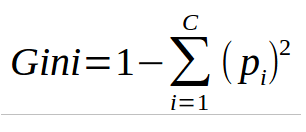

# Xây dựng Decision Tree Classifier để dự đoán mức độ an toàn của xe hơi

- PRICE overall price
- buying buying price
- maint price of the maintenance
- doors number of doors
- persons capacity in terms of persons to carry
- lug_boot the size of luggage boot
- safety estimated safety of the car

Attribute Information:
- Class Values:
unacc, acc, good, vgood
- Attributes:
- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high.

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [23]:
df = pd.read_csv('car_evaluation.csv', header=None)

In [24]:
df.shape

(1728, 7)

Rename column names

In [25]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


- Kiểm tra tần suất của các biến phân loại.

In [27]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:  
    print(df[col].value_counts()) 

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


Có thể thấy rằng column door và column person chứa các giá trị nguyên bản chất là biến phân loại

Summary of variables:
- Có 7 column và tất cả đều là biến phân loại
- column target: column 'class'

Check missing values :

In [28]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

- Khám phá column target:

In [29]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [31]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Feature Engineering

Feature Engineering là quá trình chuyển đổi dữ liệu thô thành các tính năng hữu ích giúp chúng tôi hiểu rõ hơn về mô hình của mình và tăng khả năng dự đoán của mô hình

In [32]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


- Bước tiếp theo cần mã hóa tất cả những biến phân loại trên trước khi train model

In [33]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [34]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


# TH1: Decision Tree Classifier với criterion là gini index

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Khởi tạo model DecisionTreeClassifier với việc chọn criterion='gini'
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# Train model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
# train xong giờ hãy dự đoán trên tập test
y_pred_gini = clf_gini.predict(X_test)

In [37]:
# Để đo lường độ chính xác của các dự đoán trong bài toán phân loại mình sẽ dùng chỉ số accuracy:
from sklearn.metrics import accuracy_score
print('Chỉ số accuracy trên tập test = {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Chỉ số accuracy trên tập test = 0.8021


Ở đây, y_test là các nhãn thực tế và y_pred_gini là các nhãn lớp được dự đoán trong tập test.

Bây giờ, mình sẽ so sánh chỉ số accuracy trên cả 2 tập train và test để kiểm tra xem có bị overfitting hay không!

In [38]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [17]:
print('Chỉ số accuracy trên tập train = {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Chỉ số accuracy trên tập train = 0.7865


Chỉ số accuracy trên tập train, test lần lượt = 0.7865 và = 0.8021, không có sự chênh lệch lớn suy ra ko có dấu hiệu bị overfitting

Giờ hãy Visualize decision-trees cách 1 dùng mô hình tree:

[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

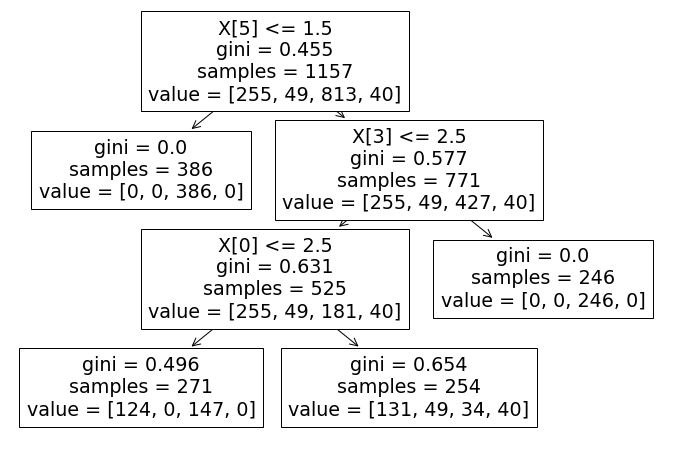

In [39]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

Visualize decision-trees cách 2 với graphviz:

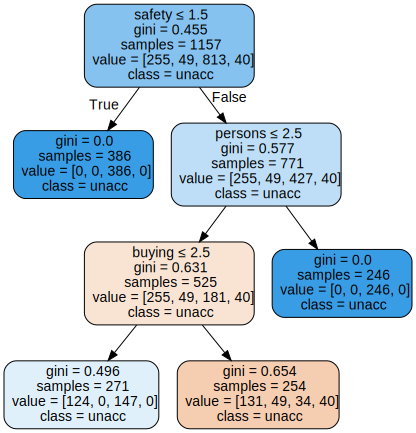

In [48]:
import graphviz 
import os
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

# TH2: Decision Tree Classifier với criterion là entropy

In [58]:
# Khởi tạo model DecisionTree với criterion='entropy'
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [59]:
#Dự đoán trên tập test:
y_pred_en = clf_en.predict(X_test)
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


Compare the train and test accuracy:

In [60]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [61]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


Check for overfitting and underfitting:

In [62]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Visualize decision-trees

[Text(0.4, 0.875, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

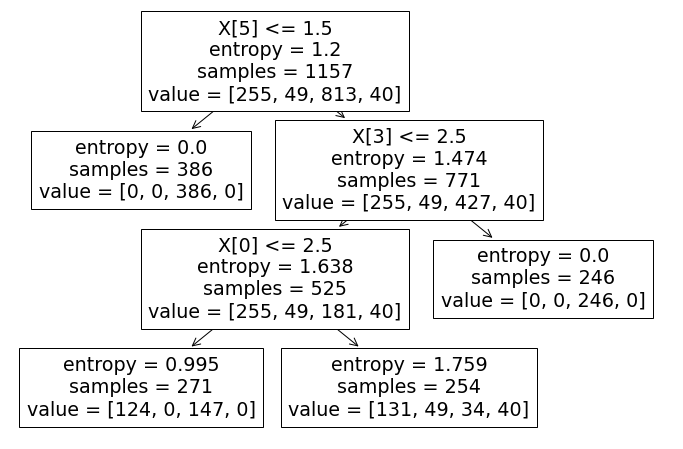

In [63]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

Visualize decision-trees with graphviz

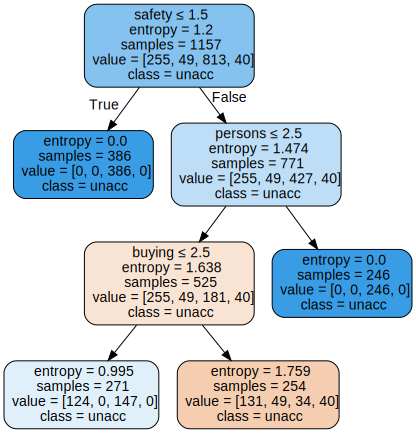

In [64]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

# Confusion matrix 

In [65]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]
